# Functions

In [334]:
%run "../Notebooks/initialization.ipynb"
%run "../Notebooks/Input_selection_functions.ipynb"
%run "../Notebooks/Visualization_functions.ipynb"
%run "../Notebooks/Downsampling_and_outliers_functions.ipynb"
%load_ext autoreload

loading directory file
----------------------------------------
loaded variables from initialization file: 
> myparams, myconfiguration_file
> list_picked_id_source, list_picked_id_target
----------------------------------------
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Input selection

Here as default the first set of 30 pictures is selected. 
It is possible though to load other sets calling the function "select_input_files(data_folder)".

From now on for "sequence" we mean a set of data taken with a continuos movement in the same direction. A new sequence starts when the direction is reversed. 

A .txt file per each set is manually created, this contains the labels to identify the sequences, it is relevant to have this prior knowledge to proceed with a successful stitching,as of course knowing the number of pcl in each sequence, which in our case is set to 10. 


In [326]:
# default
all_paths_images,all_paths_ply, num_images,labels = load_input(data_folder)

default set:
-imgfolder, contains 30 images 
-plyfolder, contains 30 ply  
found labels file: 
['External', 'Internal', 'Upper']


In [327]:
## uncomment following line to select different ply and img folders as input
all_paths_images,all_paths_ply,num_images,labels = select_input_files(data_folder)

default set: 
-imgfolder 
-plyfolder 
do you want to select a different input? [y/n]
y

Available folders in 
/Users/ariannataormina/Documents/GitHub/02507-Project_work_Image_Analysis_and_Computer_Graphics/data: 

(subfolder,number of files)
1)  imgfolder, with 30 files
2)  imgfolder_2, with 20 files
3)  imgfolder_3, with 0 files
4)  plyfolder, with 30 files
5)  plyfolder_2, with 20 files
6)  plyfolder_3, with 0 files

select images input folder
imgfolder_2
select ply input folder
plyfolder_2
found labels file: 
['External', 'Upper']


# Sort sequences appropriately

In the first set of teeth we got 30 images in sequences of 10:
- seq_1: external images are sorted as 0 to 9
- seq_2: internal images are sorted as 9 to 0
- seq_3: upper images are sorted as 0 to 9

In the second set of teeth we got 20 images in sequences of 10:
- seq_1: external images are sorted as 0 to 9
- seq_2: internal images are sorted as 9 to 0

The data is taken with a intradental camera which moves from one side to the other of the mounth, with small movements (2-5mm) which need to guarantee enough overlapping between the pictures/point clouds to allow proper reconstruction. 

From a quick look at the pictures we notice that we always need to reverse the order of the second sequence (seq_1) images and ply (done at the beginning of next notebook).


In [328]:
num_img_per_side = 10

In [347]:
# read all images
all_images = [cv2.imread(path) for path in all_paths_images]

# create sequences of the same lenght
# eg
# seq_0 = external 
# seq_1 = internal
# seq_2 = upper

list_sequences = list(chunks(all_images, num_img_per_side))
lseq = len(list_sequences)
print (f"Found {lseq} sequences of {num_img_per_side} images each")
for s in list(range(1, lseq, 2)):
    ## reverse sequences 1,3,5...
    print (f"Reversed order of sequence {s}")
    list_sequences[s].reverse()
    

Found 2 sequences of 10 images each
Reversed order of sequence 1


# plot tooth

In [330]:
# tooth 9 out of the 10 
t = 9

In [331]:
# all the visualizations of that tooth
one_set = [seq[t] for seq in list_sequences]

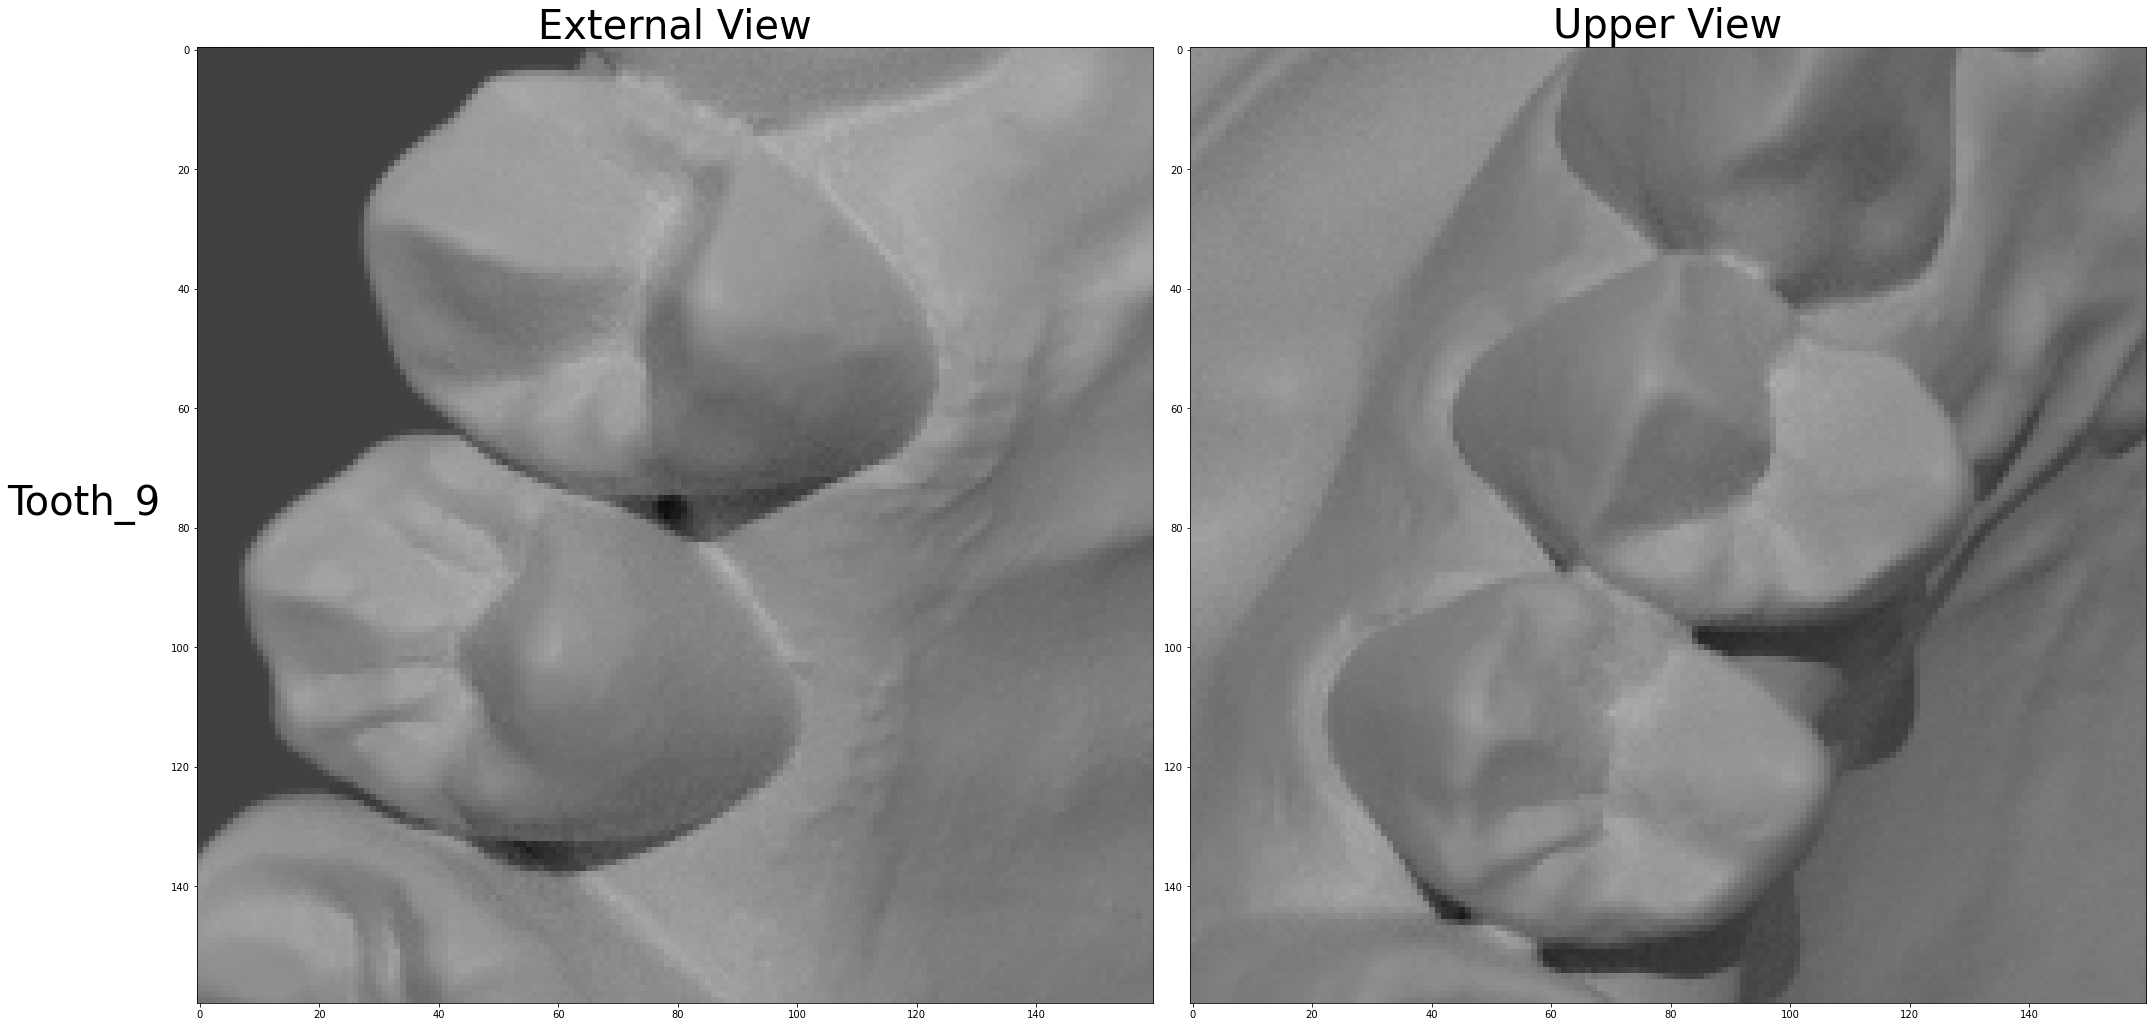

In [332]:
display_one_tooth(one_set,toothnum = t, rows = 1, cols=len(one_set),labels = labels)

# plot multiple teeth

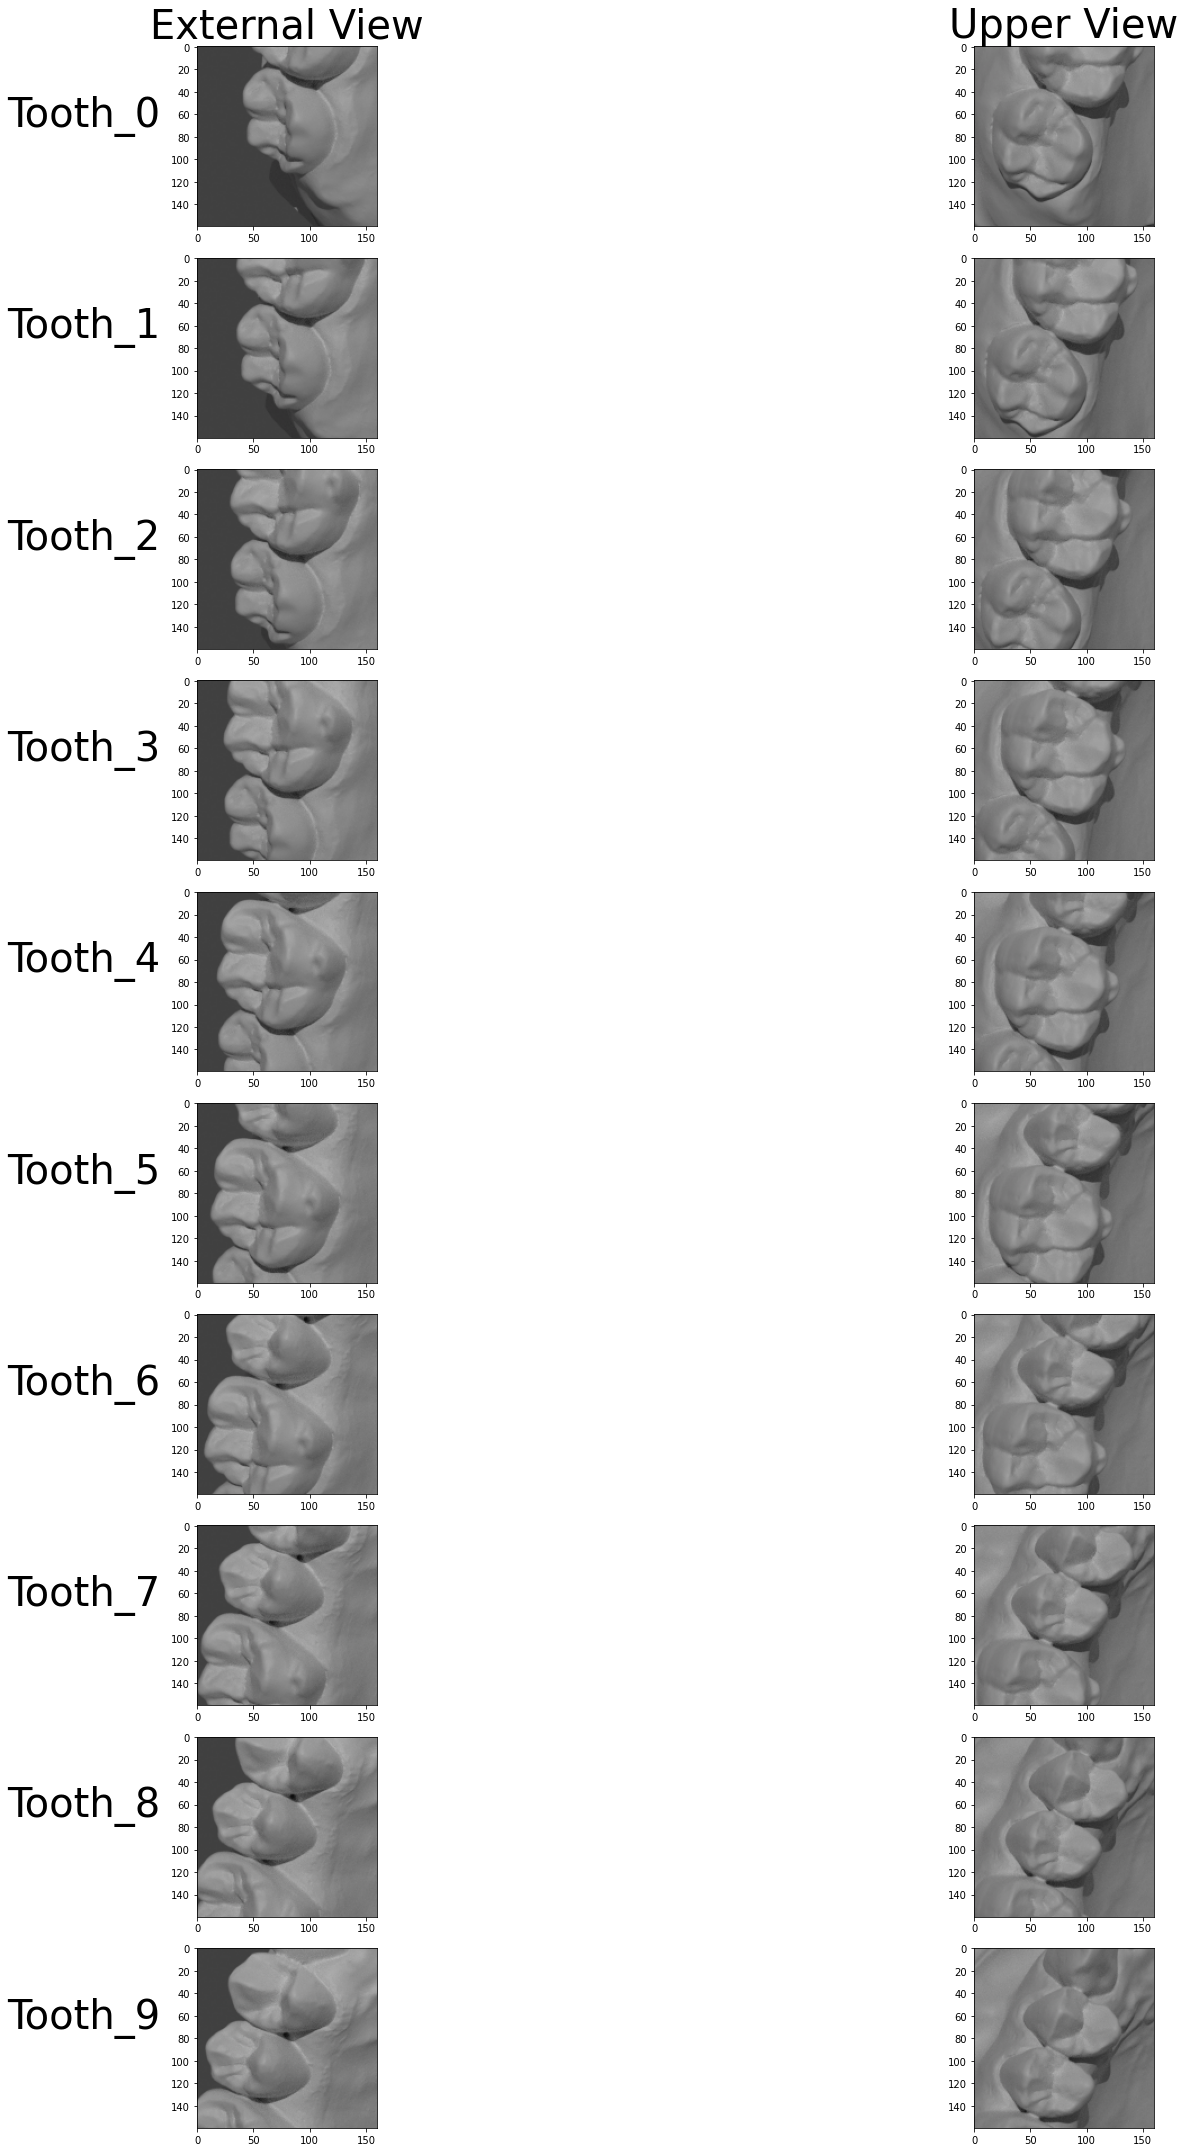

In [336]:
T = (0,10)
many_images = [seq[T[0]:T[1]] for seq in list_sequences]
display_multiple_teeth(many_images,T, rows = len(upper_img[T[0]:T[1]]), cols=len(many_images),labels = labels)

# Load Point Clouds

Open3D offers an interactive visualization mode in a pop up window. 

Until the pop up window is not closed, either by pressing the key "q" or by clicking on the "x", no further code can be run.

The following set of instruction is printed out by pressing the key "h" while in visualization mode. 

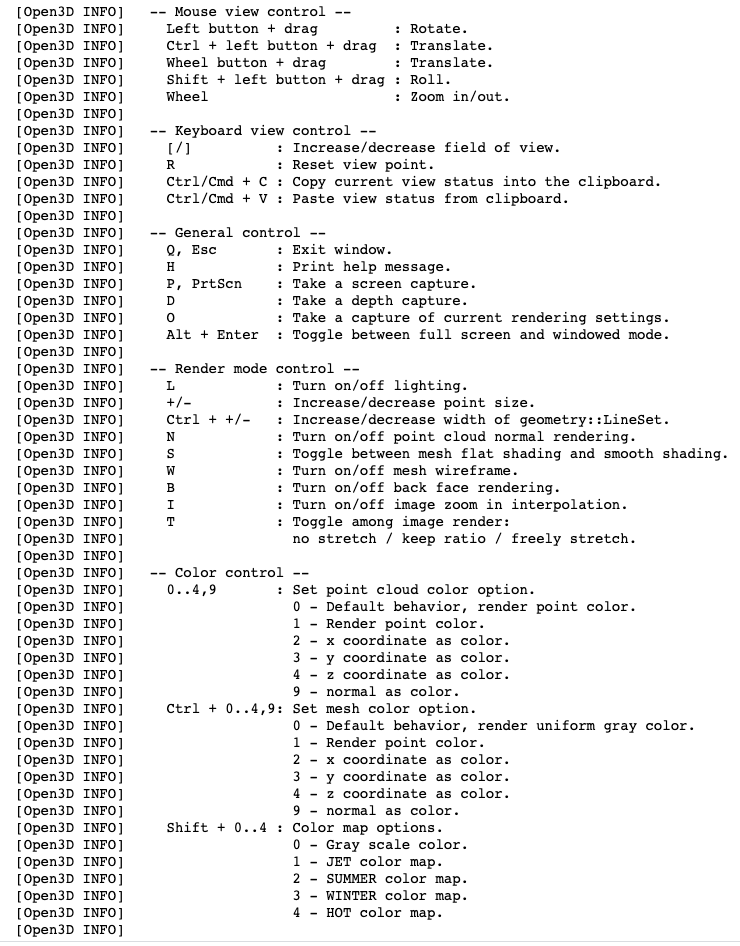

In [83]:
# instructions
Im(filename='instructions.png',
  width = 500) 

### load one point cloud 

In [337]:
#load one point cloud 
# http://www.open3d.org/docs/release/python_api/open3d.geometry.PointCloud.html
test_num = 18
path = ply_folder+"/"+all_ply[test_num]
pcd = o3d.io.read_point_cloud(path)
print(pcd)
## how to access the points
print(np.asarray(pcd.points))

PointCloud with 25034 points.
[[-8.703826 -8.703826 44.407273]
 [-8.581762 -8.690391 44.338732]
 [-8.460229 -8.677158 44.271216]
 ...
 [10.349707 10.618531 54.861951]
 [10.494036 10.628575 54.913847]
 [10.626841 10.626841 54.904886]]


As said already quite some stuff is going on in visualization mode.
Through visualization mode is possible for example to reduce the size of the points (keys + and -), change light settings (L), show the normals (N), rotate and translate the point cloud.

> Settings such as light, size of the dots etc can be saved in a **myconfiguration_file** in .json format by pressing key "O"

> Camera settings, eg point of view and zoom, can be saved in a **myparams file** in .json format by pressing key "P", this at the same time saves a Screen f the current view in ".png"

By default in initialization the latest visualization parameters saved are used. 
After saving new values by pressing "o" and "p" in visualization mode, is possible to load them as default by using the function:
> myparams, myconfiguration_file = last_visualization_parameters()

or equivalently re-run the initialization notebook
> %run "../Notebooks/initialization.ipynb"

In [349]:
myparams, myconfiguration_file = last_visualization_parameters()

### visualize point cloud- default function

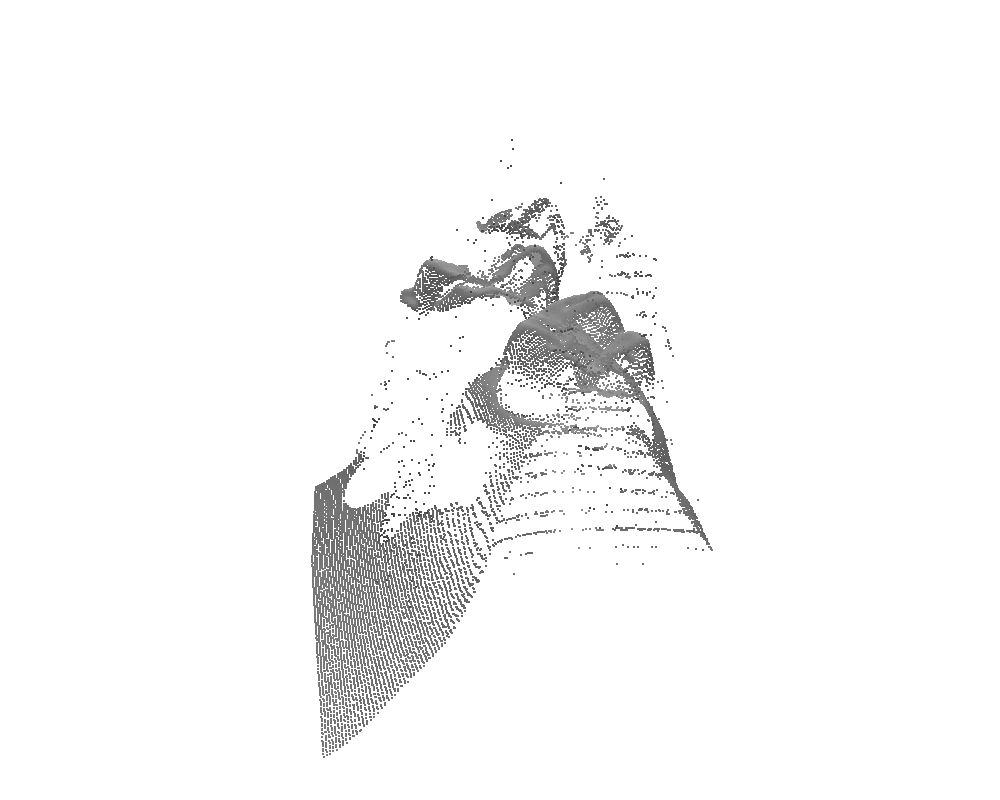

In [344]:
#simple point cloud visualization 
### visualize point cloud- opens a pop up window
mytitle = "generic_visualization"
o3d.visualization.draw_geometries([pcd],
                                 width=1000, height=800,
                                 window_name='%s'%(mytitle)) 

# after manual changing in visualization mode
newest = last_file_containing("generic_visualization", extension = '.png')
Im(filename=newest,width = 800)

In [345]:
## if you have taken a picture by pressing P in the previous visualization 
## you can see it by uncommenting the following two lines

#newest = last_file_containing("Screen", extension = '.png')
#Im(filename=newest,width = 800)

### visualize point could -custom made

This custom visualization allows to play more with parameters and editors.
* pcl: the point cloud or list of point clouds. 
* mytuples:  allows to give a tuple of (labels,values) that are used in the window label and in the save file, this comes handy while testing the effects of chaging parameters 
* params and configuration_file: allow to load settings in the visualization, as previously explained
* take_screen_shot: if true automatically takes a screen of the last view before closing the window and saves it with appropriate unique naming
* rotate: False, True or interactive. 
    * if set to False, the pcl is static
    * If set to True the pcl rotates in this case set take_screen_shot to False to avoid a black screen picture. 
    * If set to "interactive"some custom keys can be implemented, as example currently:
            >key_to_callback[ord("R")] = load_render_option
            >key_to_callback[ord("S")] = spin the pcl
            >key_to_callback[ord("B")] = change_background_to_black
            >key_to_callback[ord("W")] = change_background_to_white
            >key_to_callback[ord("A")] = plot_axes
            
* onewindow: if there is a list of point clouds given as input, if onewindow is set to True, they will all be plot in the same visualization, otherwise they will be plot in different windows (always needing to close one to open the next). 

[Open3D WARNING] GLFW Error: The GLFW library is not initialized


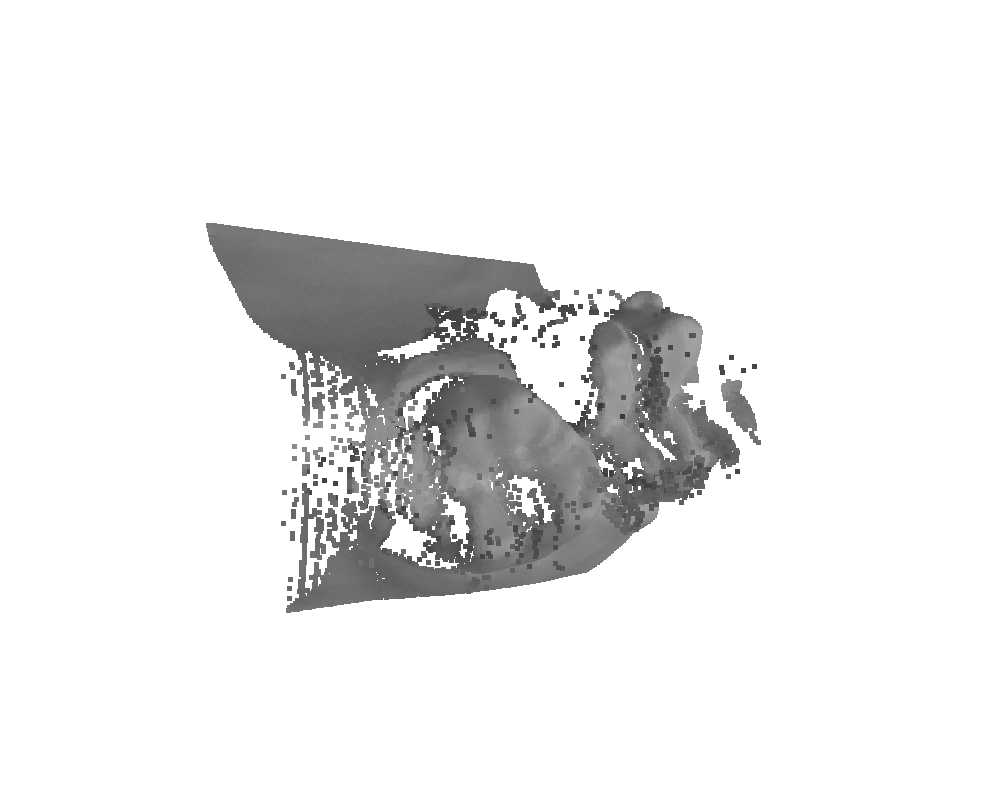

In [350]:
custom_draw_geometry(pcd, 
                         mytitle =  "generic_visualization", mytuples = None,
                         params =None,  
                         configuration_file = None, 
                         take_screen_shot = False, 
                         rotate = True,
                         onewindow = False)

newest = last_file_containing("Screen", extension = '.png')
Im(filename=newest,width = 400) 

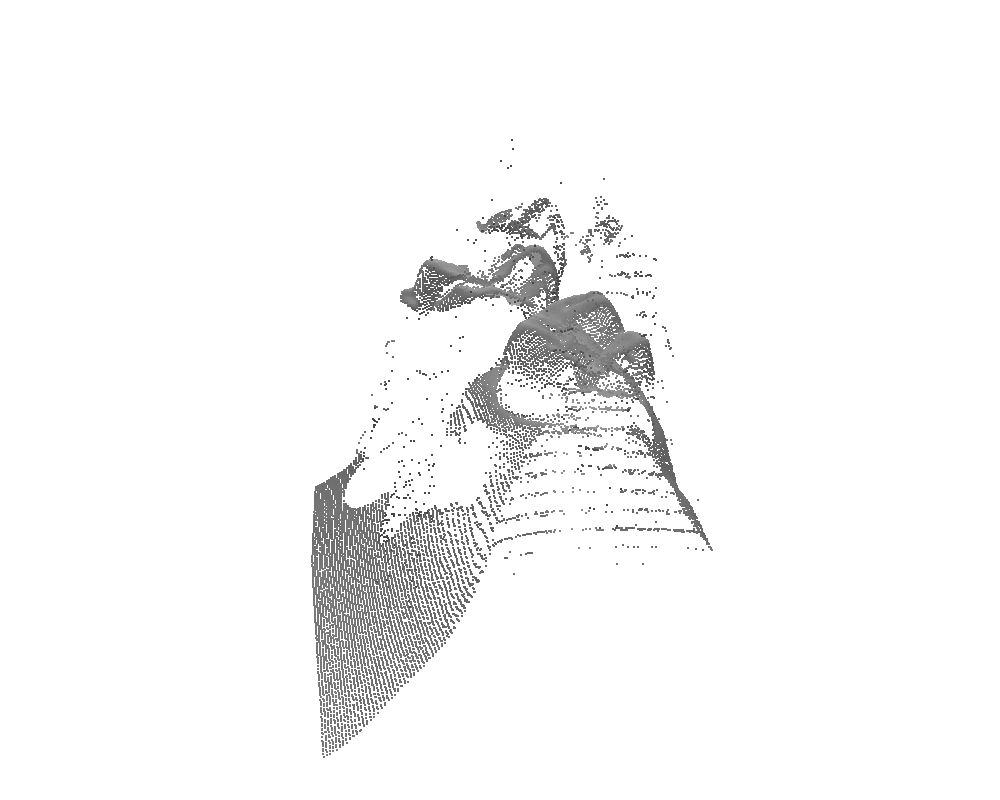

In [353]:
# https://github.com/intel-isl/Open3D/issues/1483
custom_draw_geometry(pcd, # point cloud
                     mytitle =  "visualization_with_given_parameters",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False) 

newest = last_file_containing(mytitle, extension = '.png')
Im(filename=newest,width = 400) 

## Downsampling

In order to speed up the process and make the computation feasable with big point clouds as input, it is necessay to downsample. 
The higher the voxel size the less points we have. 

number of points  25034
number of points with voxel down sample 3302


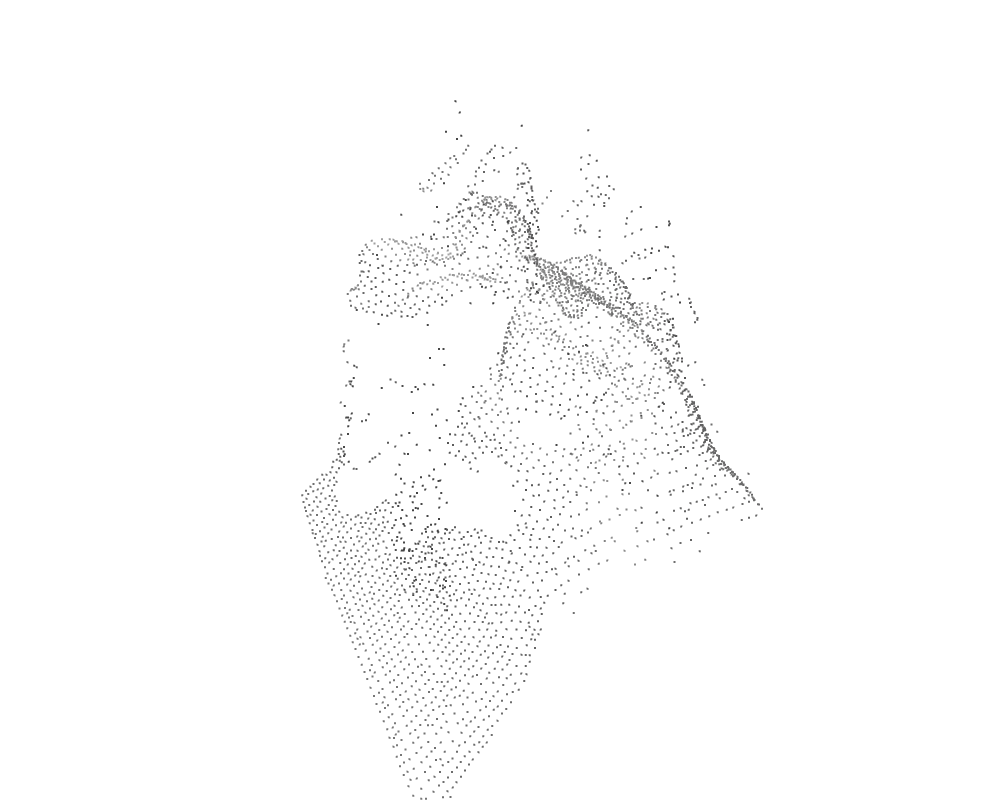

In [358]:
down_pcd = pcd.voxel_down_sample(voxel_size=0.5)
print ("number of points " ,len(np.array(pcd.points)))
print ("number of points with voxel down sample" ,len(np.array(down_pcd.points)))
#o3d.visualization.draw_geometries([down_pcd.paint_uniform_color([0.8, 0.8, 0.8])])

custom_draw_geometry(down_pcd, # point cloud
                     mytitle = "down_pcd",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False) 

newest = last_file_containing("down_pcd", extension = '.png')
Im(filename=newest,width = 400) 

### outlier removal

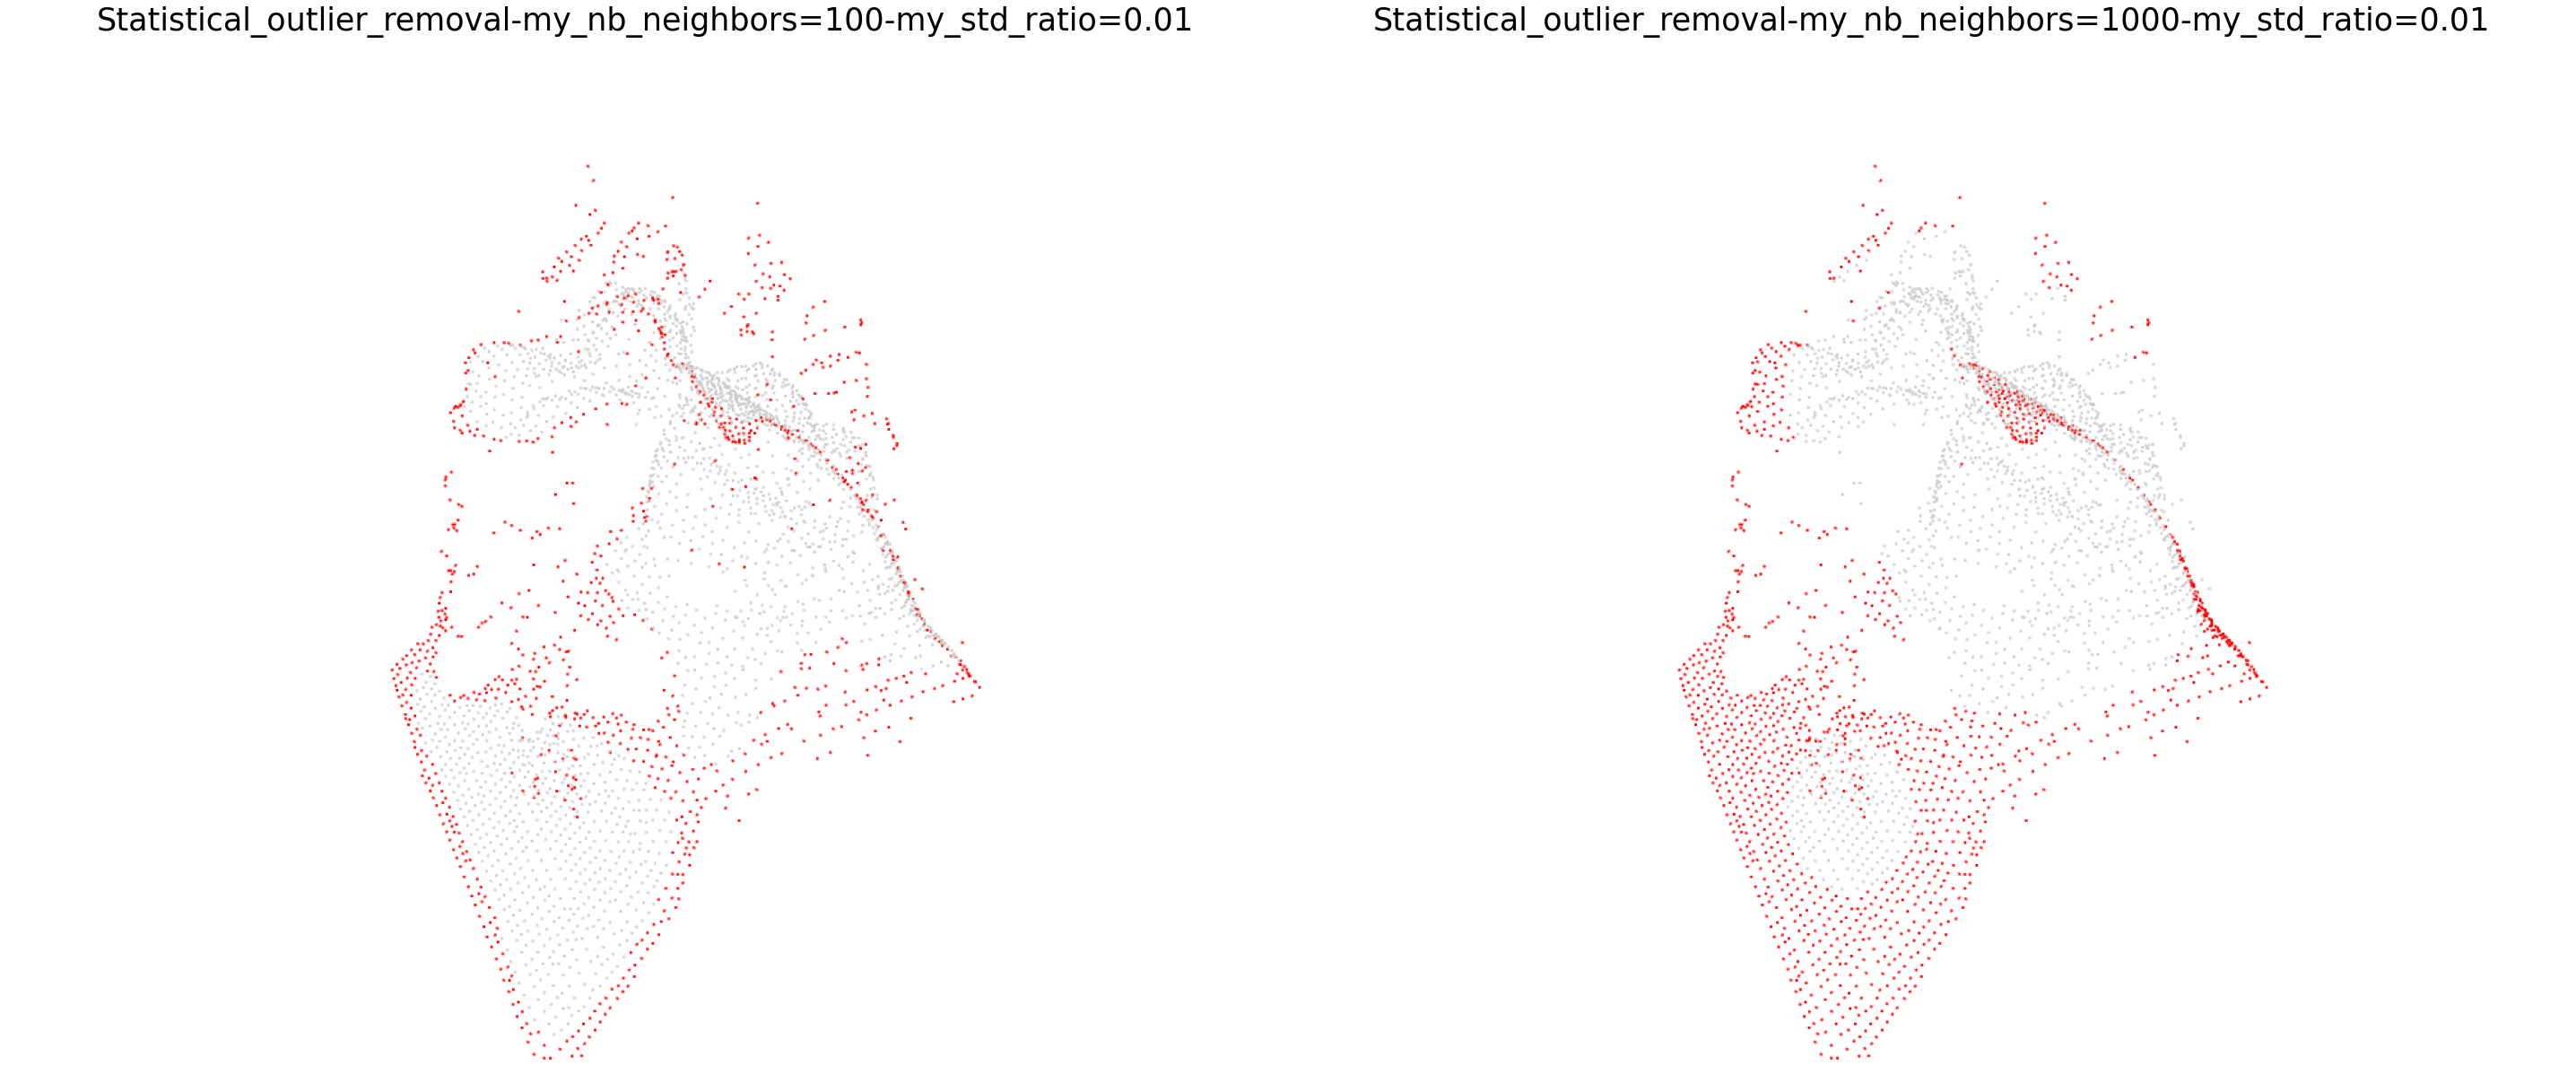

In [359]:
### Statistical oulier removal
# effect is to highlight the contours
# increasing the number of neightbors more outliers in the countours
# de creasing the number std_ratio gives wider contours
mytitle ="Statistical_outlier_removal"

# check how different parameters influence the outlier removal
my_nb_neighbors=[100,1000]
my_std_ratio=[0.01,0.01]

my_n = len(my_std_ratio)


for i in range(my_n):
    
    parameters = (my_nb_neighbors[i],my_std_ratio[i])
    parameters_labels = ("my_nb_neighbors","my_std_ratio")
    mytuples = list(zip(parameters_labels,parameters))

    cloud, ind = down_pcd.remove_statistical_outlier(nb_neighbors=my_nb_neighbors[i],
                                                    std_ratio=my_std_ratio[i])
    display_inlier_outlier(down_pcd, ind, 
                           mytitle, mytuples,
                           params =myparams, 
                           configuration_file = myconfiguration_file, 
                           take_screen_shot = True,
                           rotate = False,
                           onewindow = True
                          )
# visualization
paths_temp = last_n_files_containing("Statistical",n= myn, extension = '.png')
img_temp = [cv2.imread(path) for path in paths_temp]

rows = 1
cols = myn
fig, axes = plt.subplots(nrows=rows,ncols=cols,squeeze=False,figsize=(40, 40))
for i in range(rows):
    for j in range(cols):
        axes[i][j].imshow(plt_format(img_temp[j]))
        axes[i][j].set_title(paths_temp[j][2:-4],fontsize = 35)
        axes[i][j].axis('off')

fig.tight_layout()    
plt.show()

## custom visualization of outliers 

['./Radius_oultier_removal-nb_points=25-radius=0.5.png', './Radius_oultier_removal-nb_points=5-radius=0.7.png']


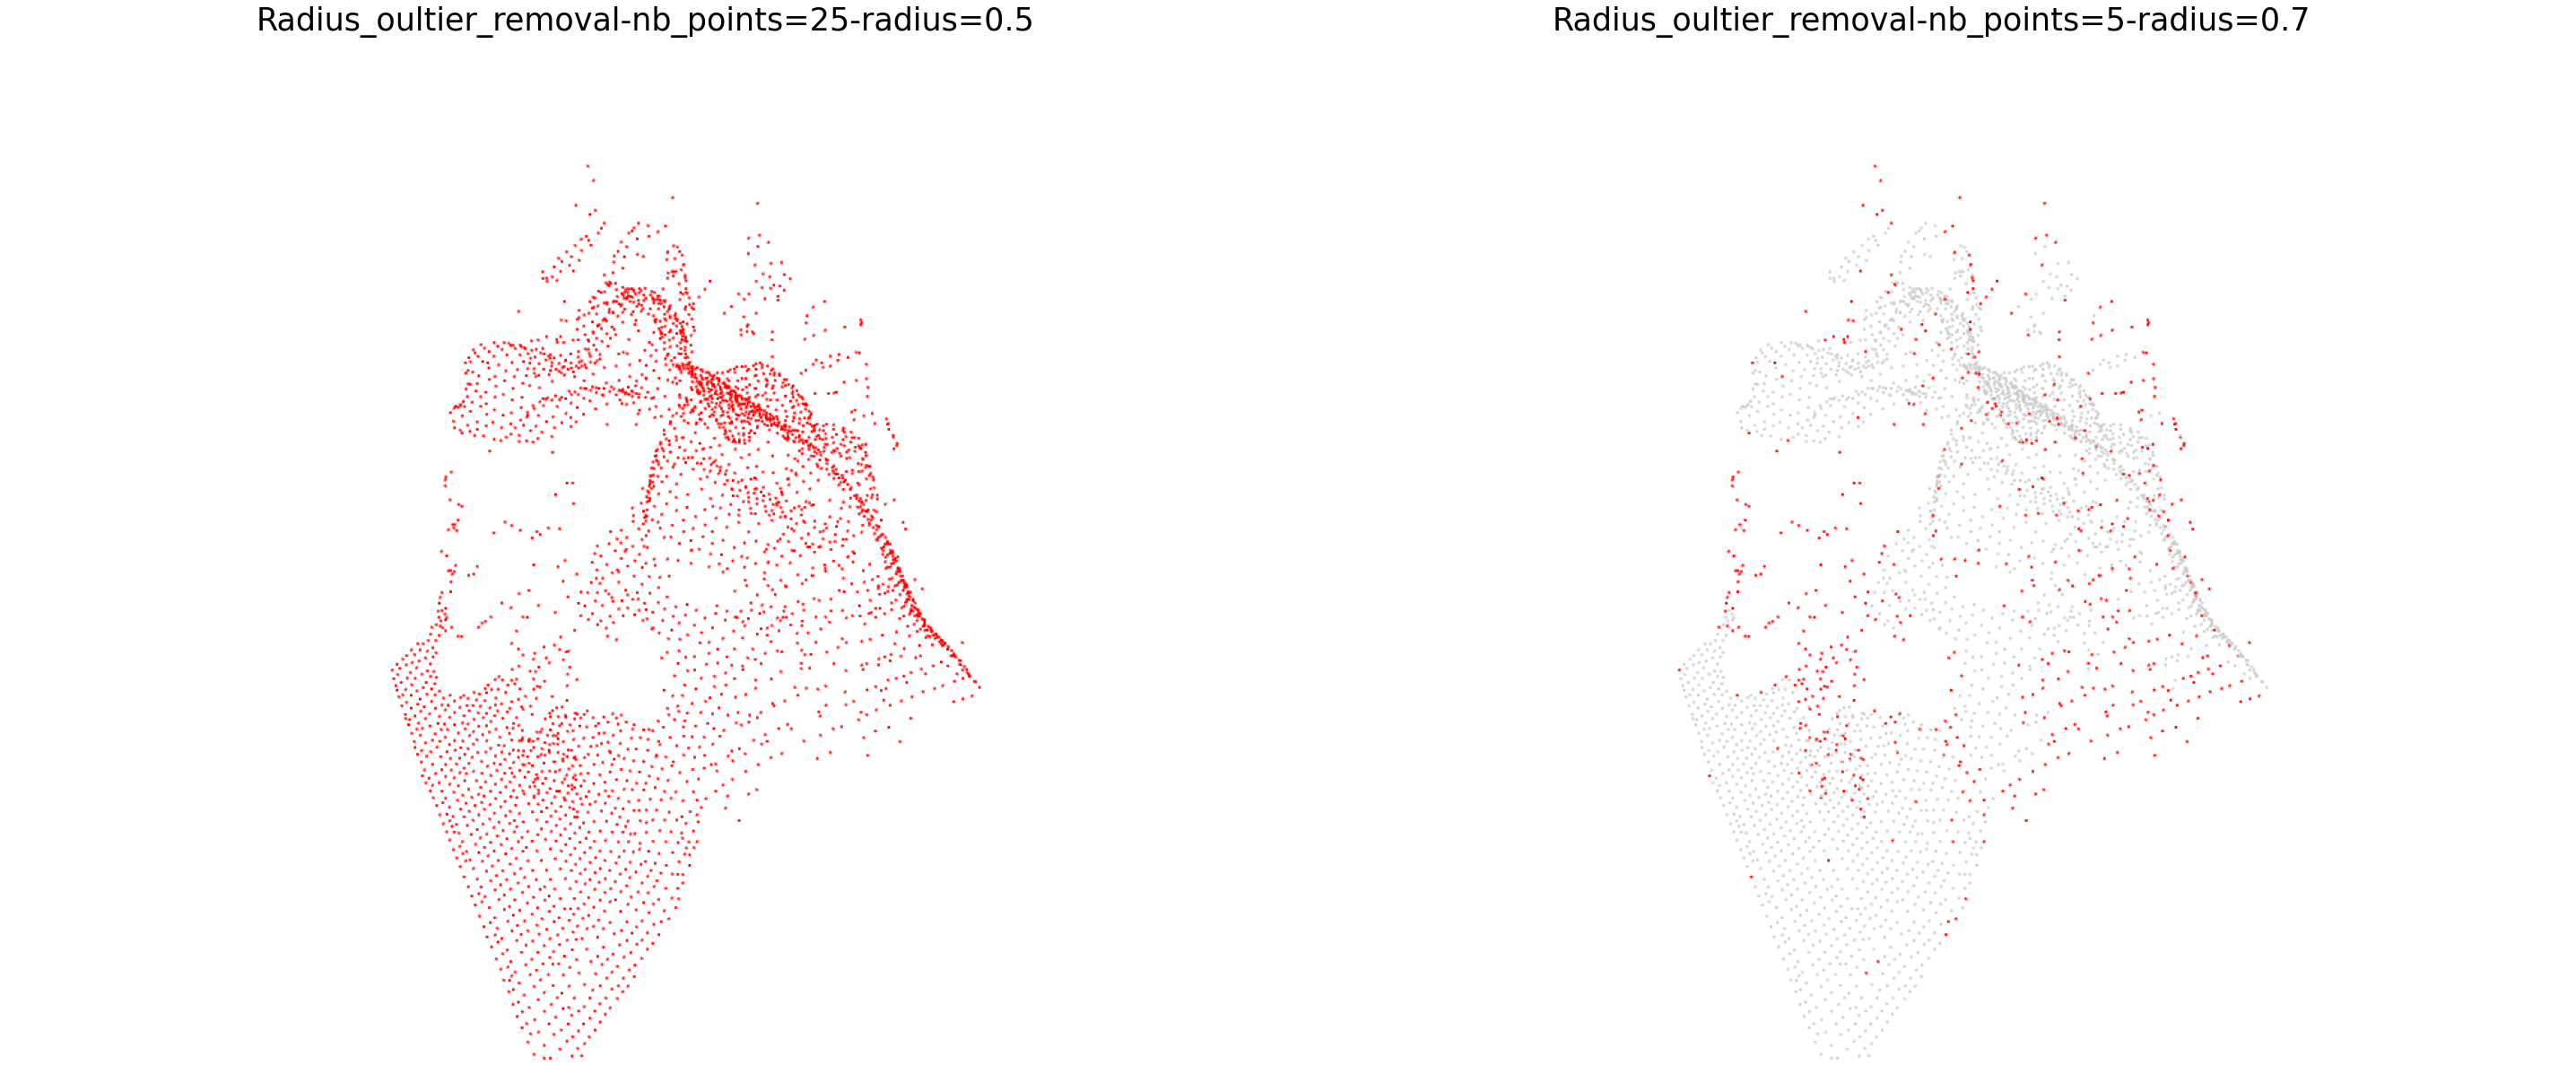

In [366]:
### Radius oulier removal
mytitle = "Radius_oultier_removal"

#test with different parameters
nb_points = [25,5]
radius = [0.5,0.7]

my_n = len(nb_points)
for i in range(my_n):
    
    parameters = (nb_points[i],radius[i])
    parameters_labels = ("nb_points","radius")
    mytuples = list(zip(parameters_labels,parameters))

    cloud, ind = down_pcd.remove_radius_outlier(parameters[0], parameters[1])
    
    display_inlier_outlier(down_pcd, ind, 
                           mytitle, mytuples,
                           params =myparams, 
                           configuration_file = myconfiguration_file, 
                           take_screen_shot = True,
                           rotate = False,
                           onewindow = True)

#visualization  
paths_temp = last_n_files_containing("Radius",n= myn, extension = '.png')
print (paths_temp)
img_temp = [cv2.imread(path) for path in paths_temp]

rows = 1
cols = myn
fig, axes = plt.subplots(nrows=rows,ncols=cols,squeeze=False,figsize=(40, 40))
for i in range(rows):
    for j in range(cols):
        axes[i][j].imshow(plt_format(img_temp[j]))
        axes[i][j].set_title(paths_temp[j][2:-4],fontsize = 35)
        axes[i][j].axis('off')

fig.tight_layout()    
plt.show()
#display_inlier_outlier(down_pcd, ind)

loading parameters: 
  ./ScreenCamera_2021-01-16-22-46-03.json
loading configuration file: 
  ./RenderOption_2021-01-16-22-46-03.json


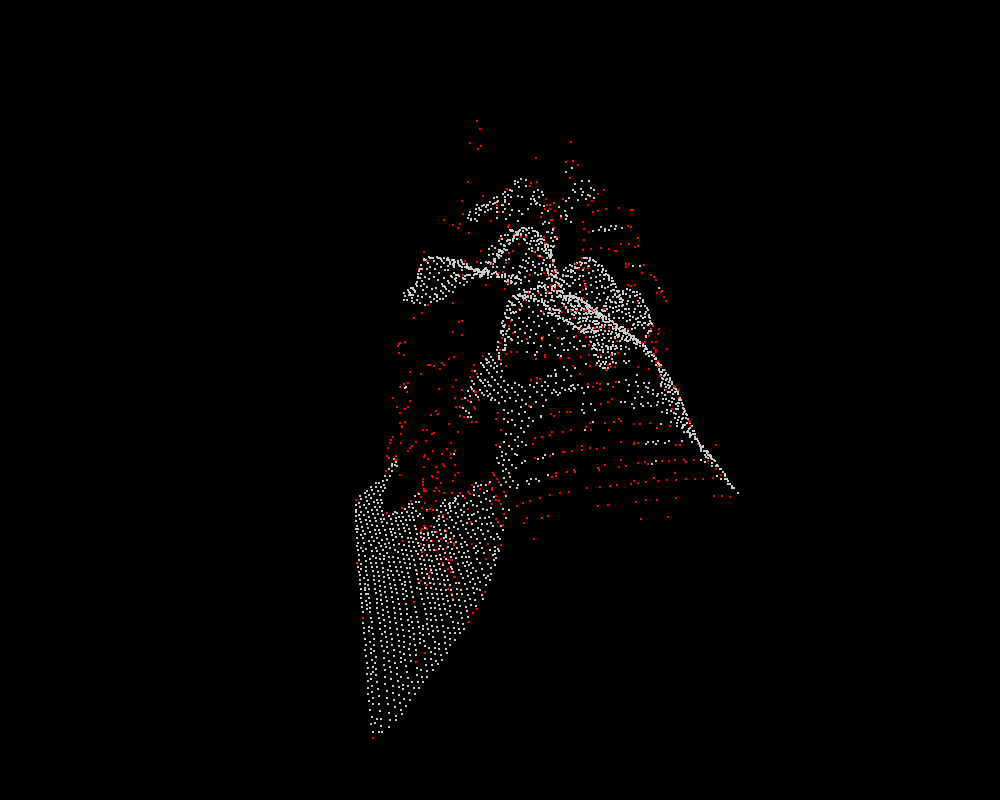

In [367]:
## same as per the custom draw geometries , this gives more personalization options possible

custom_draw_geometry_outliers(down_pcd, ind, 
                              mytitle = "Radius_oulier_removal", mytuples = mytuples,
                              params = myparams,  # parameter for camera point view, json file via pressing P
                              take_screen_shot = False,
                              configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                              rotate = "interactive")

Im(filename=last_file(".png"),
  width = 500, height = 400) 

39.79776370552528
Define parameters used for hidden_point_removal
Get all points that are visible from given view point
loading parameters: 
  ./ScreenCamera_2021-01-16-22-46-03.json
loading configuration file: 
  ./RenderOption_2021-01-16-22-46-03.json


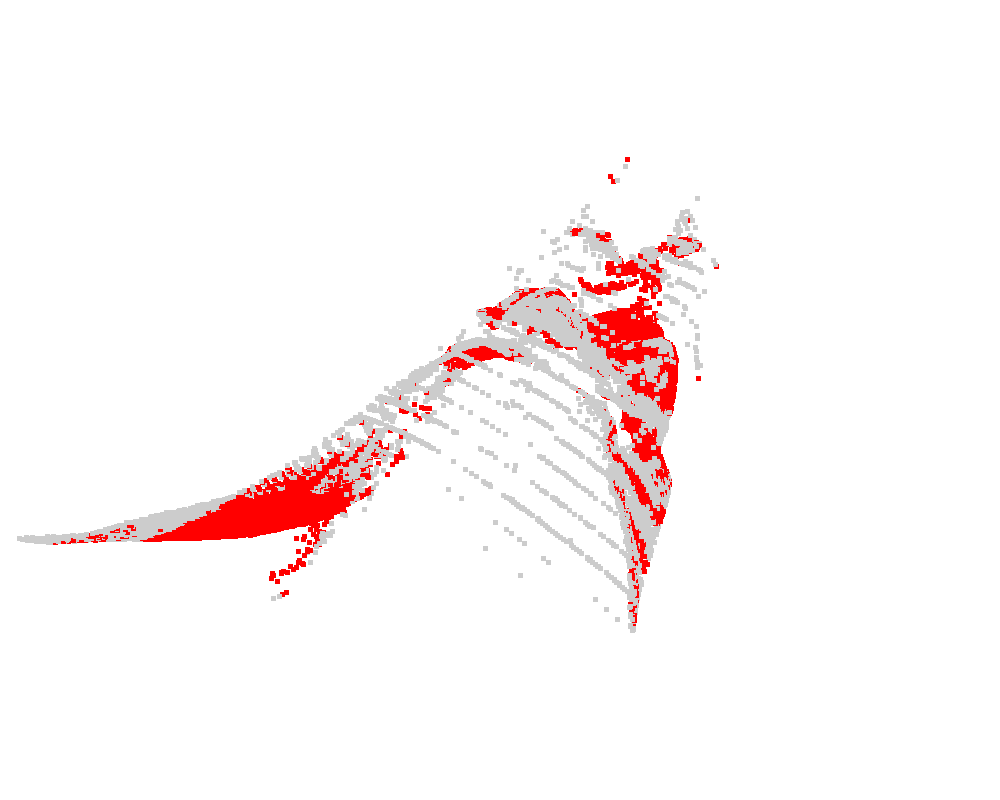

In [368]:
### hidden points removal
#this function allows to remove points that wouldnt be visible from a certain prespective 
#(eg if we are looking at an object from behind, the point in the front should be deleted)
# anyhow it is difficult to find an application of this function without a known geometry, so we havent really used this.

diameter = np.linalg.norm(
                          np.asarray(pcd.get_max_bound()) - np.asarray(pcd.get_min_bound()))
print (diameter)
print("Define parameters used for hidden_point_removal")
a = 10
b = 0
camera = [a, b, diameter]
radius = diameter * 200

print("Get all points that are visible from given view point")
pcd_clean, pt_map = pcd.hidden_point_removal(camera, radius)

#print("Visualize result")
custom_draw_geometry_outliers(pcd, pt_map, 
                              mytitle = "Radius_oulier_removal", mytuples = mytuples,
                              take_screen_shot = False,
                              params = myparams,  # parameter for camera point view, json file via pressing P
                              configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                              #fov_step  = 15,
                              rotate = "interactive")

Im(filename=last_file(".png"),
  width = 500, height = 400) 